<a href="https://colab.research.google.com/github/deepsyyt/MLBasics/blob/master/Module2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Basics
In this module, you'll be implementing a simple Linear Regressor and Logistic Regressor. Obtain salary data using `wget` from [here](https://raw.githubusercontent.com/solarillion/MLBasics/master/Data/Salary_Data.csv). <br> <br>
**Pipeline:**
* Acquiring the data - done
* Handling files and formats - done
* Data Analysis - done
* Prediction
* Analysing results

## Imports
You may require NumPy, pandas, matplotlib and scikit-learn for this module. Do not, however, use the inbuilt Linear and Logistic Regressors from scikit-learn.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset
You can load the dataset and perform any dataset related operations here. Split the data into training and testing sets. Do this separately for the regression and classification problems.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Load the dataset
dataset = pd.read_csv("/content/Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0


In [6]:
dataset.shape

(30, 2)

In [7]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


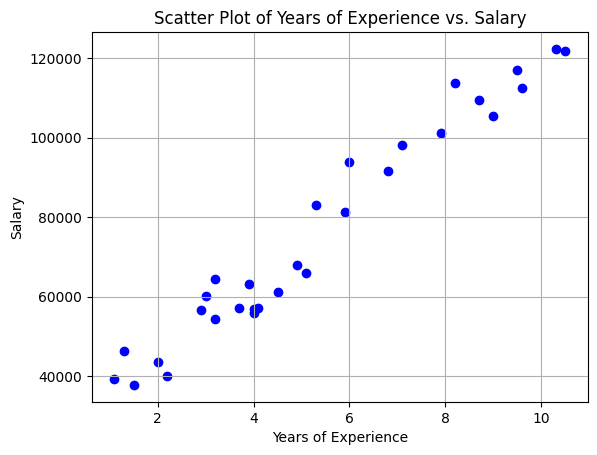

In [4]:
x = dataset['YearsExperience']
y = dataset['Salary']

# Plotting the scatter plot
plt.scatter(x, y, color='blue', marker='o')
plt.title('Scatter Plot of Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [8]:
# For Regression
regression_X = dataset[['YearsExperience']]
regression_y = dataset['Salary']

# Splitting the regression data into training and testing sets
regression_X_train, regression_X_test, regression_y_train, regression_y_test = train_test_split(
    regression_X, regression_y, test_size=0.2, random_state=42
)

In [14]:
print(f"shape of training data x {regression_X_train.shape},shape of training data y{regression_y_train.shape}")

shape of training data x (24, 1),shape of training data y(24,)


In [15]:
print(f"shape of test data x {regression_X_test.shape},shape of test data y {regression_y_test.shape}")

shape of test data x (6, 1),shape of test data y (6,)


In [16]:
# For Classification
# binary target variable 'Salary<60000' (1 if salary is less than 60000, 0 otherwise)
dataset['Salary<60000'] = dataset['Salary'].apply(lambda x: 1 if x < 60000 else 0)
classification_X = dataset[['YearsExperience']]
classification_y = dataset['Salary<60000']

# Splitting the classification data into training and testing sets
classification_X_train, classification_X_test, classification_y_train, classification_y_test = train_test_split(
    classification_X, classification_y, test_size=0.2, random_state=42
)

In [17]:
counts = classification_y.value_counts()
print(counts)

0    19
1    11
Name: Salary<60000, dtype: int64


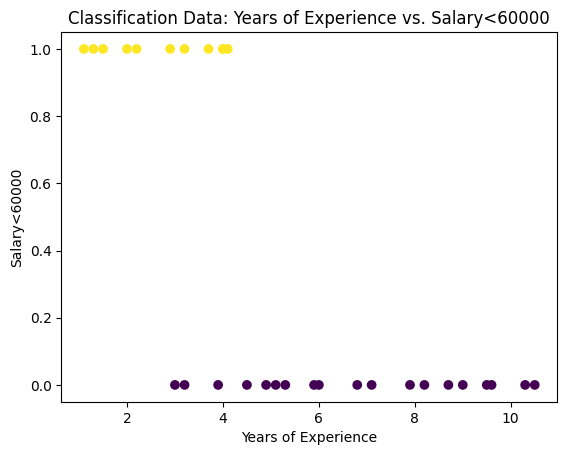

In [44]:
# Plotting the data points
plt.scatter(classification_X, classification_y, c=classification_y, cmap='viridis')
plt.xlabel('Years of Experience')
plt.ylabel('Salary<60000')
plt.title('Classification Data: Years of Experience vs. Salary<60000')
plt.show()

## Task 1a - Linear Regressor
Code your own Linear Regressor here, and fit it to your training data. You will be predicting salary based on years of experience.

In [64]:
class LinearRegressor:
    def __init__(self, learning_rate=0.001, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for epoch in range(self.epochs):
            # Predictions
            predictions = self.predict(X)

            # Calculate gradients
            gradients = -2 * np.dot(X.T, (y - predictions)) / len(y)
            bias_gradient = -2 * np.sum(y - predictions) / len(y)

            # Update weights and bias
            self.weights -= self.learning_rate * gradients
            self.bias -= self.learning_rate * bias_gradient

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


# Instantiate Linear Regressor
regressor = LinearRegressor(learning_rate=0.001, epochs= 10000)

# Fit the model
regressor.fit(regression_X_train, regression_y_train)

# After fitting, you can make predictions
predictions_regression  = regressor.predict(regression_X_test)

# Create a DataFrame to display actual, predicted, and input values
result_df_regression = pd.DataFrame({'YearsExperience': regression_X_test['YearsExperience'].values,
                           'Actual': regression_y_test.values,
                           'Predicted': predictions_regression})
result_df_regression

,YearsExperience,Actual,Predicted
0,9.6,112635.0,115888.385722
1,4.9,67938.0,71434.933381
2,8.2,113812.0,102646.931833
3,5.3,83088.0,75218.205920
4,3.2,64445.0,55356.025087
5,3.7,57189.0,60085.115762


## Task 1b - Logistic Regression
Code your own Logistic Regressor here, and fit it to your training data. You will first have to create a column, 'Salary<60000', which contains '1' if salary is less than 60000 and '0' otherwise. This is your target variable, which you will aim to predict based on years of experience.

In [62]:
import numpy as np
import pandas as pd

# Define logistic regression class
class LogisticRegressor:
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Add a column of ones to X for the bias term
        X = np.c_[np.ones(X.shape[0]), X]

        # Initialize weights
        self.weights = np.zeros(X.shape[1])

        for epoch in range(self.epochs):
            # Calculate predicted probabilities
            predictions = self.sigmoid(np.dot(X, self.weights))

            # Calculate the gradient
            gradient = np.dot(X.T, (predictions - y)) / len(y)

            # Update weights
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        # Add a column of ones to X for the bias term
        X = np.c_[np.ones(X.shape[0]), X]

        # Predict probabilities
        probabilities = self.sigmoid(np.dot(X, self.weights))

        # Convert probabilities to binary predictions
        predictions = (probabilities >= 0.5).astype(int)

        return predictions

# Instantiate and fit the logistic regression model
logistic_model = LogisticRegressor(learning_rate=0.01, epochs=1000)
logistic_model.fit(classification_X_train, classification_y_train)

# Make predictions on the training set
predictions_classification = logistic_model.predict(classification_X_test)

# Create a DataFrame to display actual, predicted, and input values
result_df_classification = pd.DataFrame({'YearsExperience': classification_X_test['YearsExperience'].values,
                           'Actual': classification_y_test.values,
                           'Predicted': predictions_classification})
result_df_classification

,YearsExperience,Actual,Predicted
0,9.6,0,0
1,4.9,0,0
2,8.2,0,0
3,5.3,0,0
4,3.2,0,0
5,3.7,1,0


## Task 2 - Results
Analyse the quality of the ML models you built using metrics such as R2, MAE and RMSE for the Linear Regressor, and Accuracy for the Logistic Regressor. Evaluate their performance on the testing set.

In [65]:
# regression
residuals = regression_y_test - predictions_regression

# R2 Score
total_variance = np.sum((regression_y_test - np.mean(regression_y_test))**2)
explained_variance = np.sum((predictions_regression - np.mean(regression_y_test))**2)
r2 = 1 - (np.sum(residuals**2) / total_variance)

# Mean Absolute Error
mae = np.mean(np.abs(residuals))

# Root Mean Squared Error
rmse = np.sqrt(np.mean(residuals**2))

print(f'R2 Score: {r2:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

R2 Score: 0.9020
Mean Absolute Error: 6295.0453
Root Mean Squared Error: 7075.8088


In [63]:
#classification
correct_predictions = np.sum(classification_y_test == predictions_classification)
accuracy = correct_predictions / len(classification_y_test)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8333
